In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
train_X.shape, train_y.shape

((60000, 28, 28), (60000,))

In [4]:
train_y[0]

5

In [5]:
def get_one_hot_y(y):
    output = []
    for i in range(y.shape[0]):
        tmp = np.array([0]*10)
        tmp[train_y[i]] = 1
        output.append(tmp)
    return np.array(output, dtype = "float64").T

def get_flatten_X(X):
    output = []
    for i in range(X.shape[0]):
        output.append(X[i].flatten())
    return np.array(output, dtype="float64").T

In [6]:
train_y_onehot = get_one_hot_y(train_y)
train_X_flatten = get_flatten_X(train_X)
test_y_onehot = get_one_hot_y(test_y)
test_X_flatten = get_flatten_X(test_X)

In [7]:
train_y_onehot.shape, test_y_onehot.shape

((10, 60000), (10, 10000))

In [8]:
train_X_flatten.shape, test_X_flatten.shape

((784, 60000), (784, 10000))

Label: 7
Y onehot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


<Figure size 432x288 with 0 Axes>

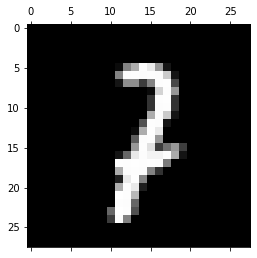

In [9]:
def plot_and_label_train_X(i):
    print("Label:", train_y[i])
    print("Y onehot:", train_y_onehot.T[i])

    plt.gray()
    plt.matshow(train_X[i])
    plt.show()

plot_and_label_train_X(np.random.randint(0,1000))

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A



In [11]:
# suppress warnings
#np.warnings.filterwarnings('ignore')


# init params
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

i = 0
m = 2

X = train_X_flatten.T[i:i+m].T # shape -> 784, m
Y = train_y_onehot.T[i:i+m].T

# forward prop
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# backward prop
dZ2 = A2-Y
dW2 = 1/m*dZ2@A1.T
db2 = 1/m*np.sum(dZ2)
dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
dW1 = 1/m*dZ1@X.T
db1 = 1/m*np.sum(dZ1)

# update poram
learning_rate = 0.2
W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1    
W2 = W2 - learning_rate * dW2  
b2 = b2 - learning_rate * db2    

<ipython-input-10-55b3045eb39a>:14: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
<ipython-input-10-55b3045eb39a>:14: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


In [24]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

learning_rate = 0.3
iterations = 10
   
for _ in range(iterations):
    i = 0
    m = 3

    while i<train_X_flatten.shape[-1]-m:
        X = train_X_flatten.T[i:i+m].T # shape -> 784, m
        Y = train_y_onehot.T[i:i+m].T

        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = ReLU(Z2)

        # backward prop
        dZ2 = A2-Y
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    
        i+=m
dZ2.T

array([[ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.]])

Label: 5
Y onehot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

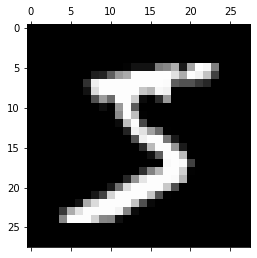

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [27]:
index = 10
plot_and_label_train_X(0)

X = train_X_flatten.T[0:1].T # shape -> 784, m
Y = train_y_onehot.T[0:1].T


Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = ReLU(Z2)
print(A2.T)
